# Data Augmentation

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from keras.preprocessing import image

Using TensorFlow backend.


In [2]:
batch_size = 32
img_size = 299
train_path = '../data/sports/train/'
test_path = '../data/sports/test/'

You may need to download the data first.

- Open a terminal
- `cd data/sports/`
- `python download_sport.py`


## Data augmentation

In [3]:
from keras.preprocessing.image import ImageDataGenerator

In [4]:
datagen = ImageDataGenerator(
    rescale=1./255.,
    rotation_range=15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=5,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

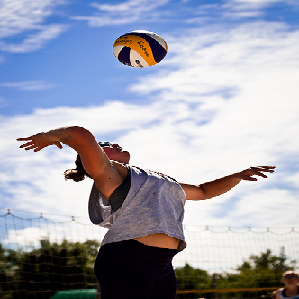

In [5]:
input_path = train_path + 'Beach volleyball/1e9ce0e76695de2e5d1f6964ab8c538.jpg'

img = image.load_img(input_path, target_size=(img_size, img_size))
img

In [6]:
img_array = image.img_to_array(img)

In [7]:
img_tensor = np.expand_dims(img_array, axis=0)

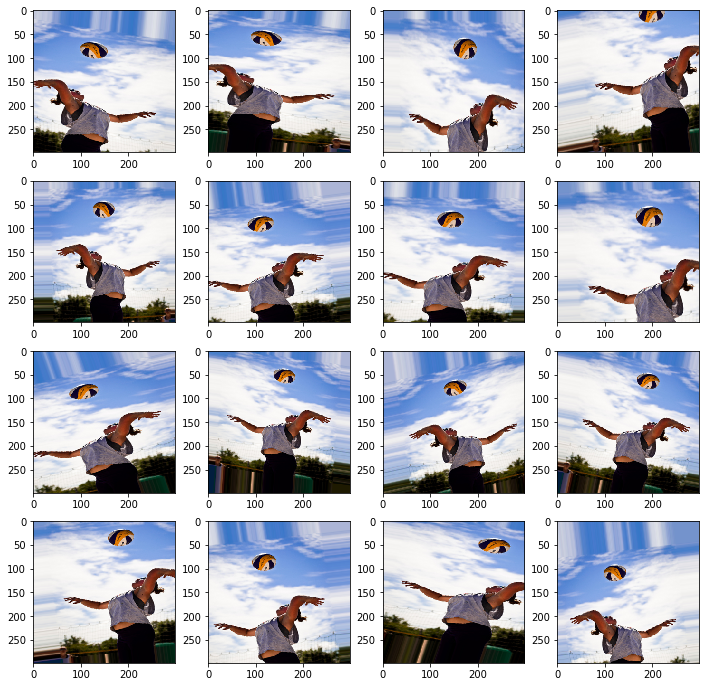

In [8]:
plt.figure(figsize=(12, 12))

i = 0
for im in datagen.flow(img_tensor, batch_size=1):
    i += 1
    if i > 16:
        break
    plt.subplot(4, 4, i)
    plt.imshow(im[0])

## Exercise 1

`datagen` also has a method called `flow_from_directory`. Use it to produce a batch of 32 images of sports flowing from the training directory.

In [9]:
train = datagen.flow_from_directory(train_path,
                                    target_size = (img_size, img_size),
                                    batch_size = batch_size,
                                    class_mode = 'binary')

Found 2100 images belonging to 3 classes.


In [10]:
batch, labels = train.next()

In [11]:
ld = {v: k for k, v in train.class_indices.items()}

In [12]:
labels_s = [ld[i] for i in labels]

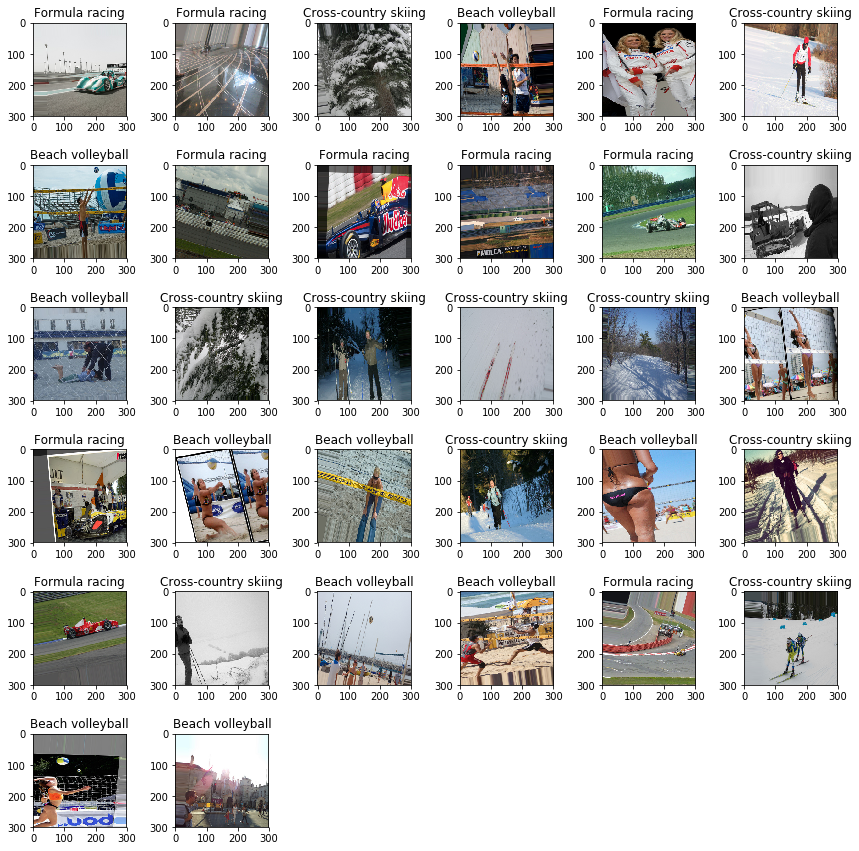

In [13]:
plt.figure(figsize=(12, 12))
i = 1
for img, label in zip(batch, labels_s):
    plt.subplot(6, 6, i)
    plt.imshow(img)
    plt.title(label)
    i += 1

plt.tight_layout()

## Convolutional model

In [14]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense

In [15]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(img_size, img_size, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
#model.add(Dense(1))
#model.add(Activation('sigmoid'))
model.add(Dense(3))
model.add(Activation('softmax'))

#model.compile(loss='binary_crossentropy',
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])


## Exercise 2

Define a training and test data generators and use them to train the model using the `model.fit_generator` function.

The training data generator should apply data augmentation while the test data generator should not modify the images except for rescaling them.

In [16]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical')#'binary')

Found 2100 images belonging to 3 classes.


In [17]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical')#'binary')

Found 902 images belonging to 3 classes.


In [18]:
history = model.fit_generator(
                    train_generator,
                    steps_per_epoch=2000 // batch_size,
                    epochs=15,
                    validation_data=test_generator,
                    validation_steps=800 // batch_size)

Epoch 1/15


ValueError: Error when checking target: expected activation_5 to have shape (1,) but got array with shape (3,)

In [ ]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Accuracy')
plt.legend(['train', 'test'])
plt.xlabel('Epochs')